In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
dataset=pd.read_csv('../input/heart-disease-dataset/heart.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
#the dataset contains 13 features which are indexed from 0-12 , and a target label at index 13

In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
'''
observations from the describtion of the dataset 
1-dataset contains 1025 records for the 13 features which will be denoted as X
2-same values for the target column Y- 1025 label which confirms no null or missing values
3-mean of the ages =54.43 over 1025 patients 
where std stands for standard deviation which is equivalent to 

sqrt((x-xp)^2)/n-1

where x is the data point coming from the dataset 
xp is the average/mean of the sample 
n: size of the sample 
First, take the square of the difference between each data point and the sample mean, finding the sum of those values.
Next, divide that sum by the sample size minus one, which is the variance.
Finally, take the square root of the variance to get the SD.



minimum age at the dataset is 29 year-old
maximum age at the dataset is 77 year-old
50% of the patients aged almost 56 years old



4-Gender or sex = average values = 0.69 which will be one / zero for male/female




5-cp refers to chest pain index

average choletroel index is 249 mg/dl

reference : 200 to 239 mg/dL


6-fasting blood sugar which describes the blood sugar test without eating from 6-8 hours

0.149

reference for normal ranges : 
0.100 to 0.125 g/dL



7-resting electrocardiographic results 


0 = normal; 1 = having ST-T; 2 = hypertrophy

normal : referes to normal echo results


ST-T : ST- and T-wave changes may represent cardiac pathology 
or be a normal variant. 
Interpretation of the findings, therefore,
depends on the clinical context and presence of similar findings on prior electrocardiograms.



hypertrophy :  a disease in which the heart muscle becomes thickened (hypertrophied). 
The thickened heart muscle can make it harder for the heart to pump blood.



8-thalach :maximum heart rate achieved

9-exang: exercise induced angina


10-old peak : ST depression induced by exercise relative to rest

11-slope : the slope of the peak exercise ST segment 
(1 = upsloping; 2 = flat; 3 = downsloping)

12-number of major vessels (0-3) colored by flourosopy

13-thal - 3 = normal; 6 = fixed defect; 7 = reversable defect


'''





'\nobservations from the describtion of the dataset \n1-dataset contains 1025 records for the 13 features which will be denoted as X\n2-same values for the target column Y- 1025 label which confirms no null or missing values\n3-mean of the ages =54.43 over 1025 patients \nwhere std stands for standard deviation which is equivalent to \n\nsqrt((x-xp)^2)/n-1\n\nwhere x is the data point coming from the dataset \nxp is the average/mean of the sample \nn: size of the sample \nFirst, take the square of the difference between each data point and the sample mean, finding the sum of those values.\nNext, divide that sum by the sample size minus one, which is the variance.\nFinally, take the square root of the variance to get the SD.\n\n\n\nminimum age at the dataset is 29 year-old\nmaximum age at the dataset is 77 year-old\n50% of the patients aged almost 56 years old\n\n\n\n4-Gender or sex = average values = 0.69 which will be one / zero for male/female\n\n\n\n\n5-cp refers to chest pain index

In [7]:

'''


using visualizations to better understand our data 
and then look at any processing we might want to do.

'''

'\n\n\nusing visualizations to better understand our data \nand then look at any processing we might want to do.\n\n'

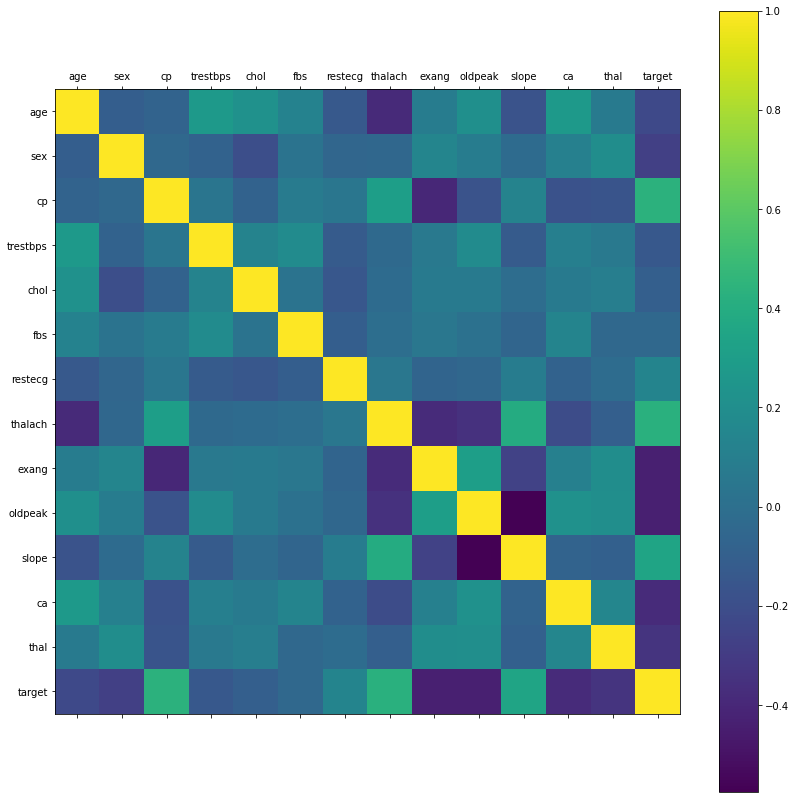

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

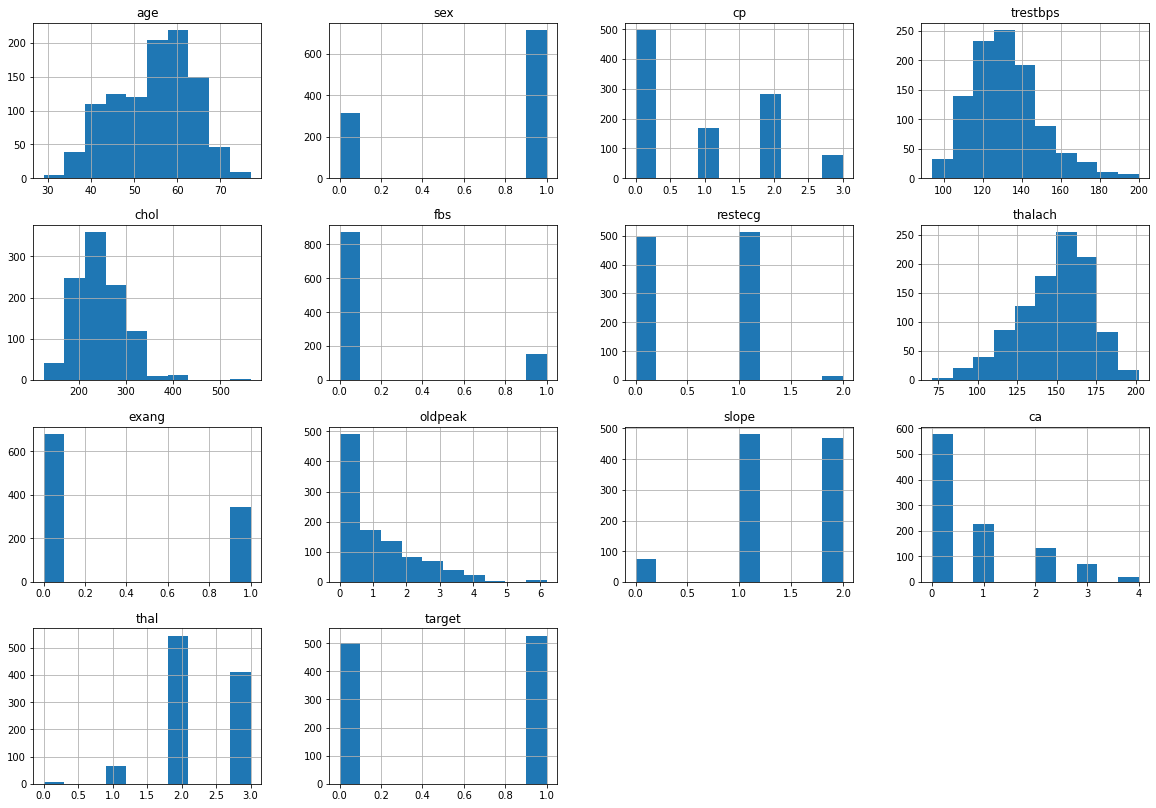

In [9]:
dataset.hist()

Text(0.5, 1.0, 'Count of each Target Class')

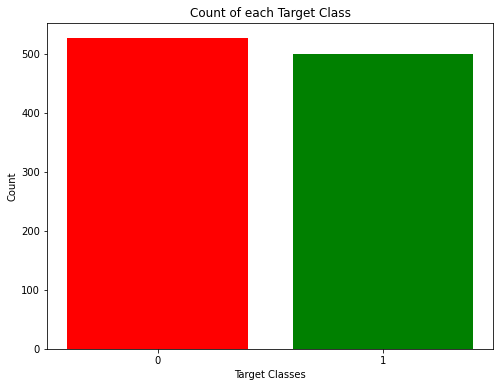

In [10]:
'''
checking class imblancing

'''


rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [11]:
'''
Data Processing
After exploring the dataset,
I observed that I need to convert some categorical variables into dummy variables 
and scale all the values before training the Machine Learning models.First, 
I'll use the get_dummies method to create dummy columns for categorical variables.

'''

#dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

"\nData Processing\nAfter exploring the dataset,\nI observed that I need to convert some categorical variables into dummy variables \nand scale all the values before training the Machine Learning models.First, \nI'll use the get_dummies method to create dummy columns for categorical variables.\n\n"

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
'''standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])'''

"standardScaler = StandardScaler()\ncolumns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']\ndataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])"

In [14]:
'''y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'''

"y = dataset['target']\nX = dataset.drop(['target'], axis = 1)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"

In [15]:
#trying K-Nearst-Neighbor
'''
knn_scores=[]
for k in range (1,18):
    knn_classifier=KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
'''


'\nknn_scores=[]\nfor k in range (1,18):\n    knn_classifier=KNeighborsClassifier(n_neighbors = k)\n    knn_classifier.fit(X_train, y_train)\n    knn_scores.append(knn_classifier.score(X_test, y_test))\n'

In [16]:
'''plt.plot([k for k in range(1, 18)], knn_scores, color = 'red')
for i in range(1,18):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 18)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')'''

"plt.plot([k for k in range(1, 18)], knn_scores, color = 'red')\nfor i in range(1,18):\n    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))\nplt.xticks([i for i in range(1, 18)])\nplt.xlabel('Number of Neighbors (K)')\nplt.ylabel('Scores')\nplt.title('K Neighbors Classifier scores for different K values')"

In [17]:
'''print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[2]*100, 3))'''

'print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[2]*100, 3))'

In [18]:
#Seperating the data and labels
X = dataset.drop(columns = 'target', axis = 1)
Y = dataset['target']

In [19]:
#Data standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [20]:
#Train,Test,Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y,random_state = 2)

In [21]:
#Model Development
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)

In [22]:
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
#Finding the accuracy score on training dataset
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
train_data_accuracy

0.9963414634146341

In [24]:
#Finding the accuracy score on test dataset
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_accuracy

0.9512195121951219

In [25]:
#Predicting system
data = (62,0,0,138,294,1,1,106,0,1.9,1,3,2)
data_array = np.asarray(data)
data_reshape = data_array.reshape(1, -1)
data_standard = scaler.transform(data_reshape)
prediction = model.predict(data_standard)
if(prediction[0] == 1):
    print('Heart Disease')
else:
    print('No Heart Disease')

No Heart Disease
